In [ ]:
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.optim as optim

In [ ]:
## device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
transform = transforms.Compose(
   [transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, ), std=(0.5, ))]
)

In [ ]:
training_dataset = datasets.MNIST(root="./data", download=True, train=True, transform=transform)
testing_dataset = datasets.MNIST(root="./data", download=True, train=False, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 486kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.25MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



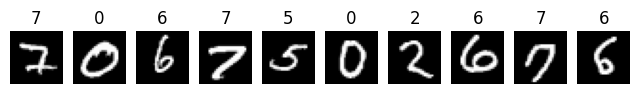

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=10, figsize=(8, 1))

for ax in axis:
    idx = np.random.randint(len(training_dataset))
    ax.imshow(training_dataset.data[idx], cmap="gray")
    ax.set_title(int(training_dataset.targets[idx]))
    ax.axis(False)

In [ ]:
training_dataloader = DataLoader(training_dataset, shuffle=True, batch_size=64, drop_last=True)
testing_dataloader = DataLoader(testing_dataset, shuffle=False, batch_size=64, drop_last=False)

In [ ]:
training_dataloader.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [ ]:
class AutoEncoder(nn.Module):

    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=2, padding=1), # 16x16
                nn.ReLU(),
                nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, stride=2, padding=1), # 8x8
                nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=8, out_channels=4, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=4, out_channels=1, kernel_size=3 ,stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
    def forward(self, x):
        x_en = self.encoder(x)
        x_dec = self.decoder(x_en)
        return x_en, x_dec


class Classification(nn.Module):

    def __init__(self):
      super(Classification, self).__init__()
      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=8*8*8, out_features=10)
      )

    def forward(self, x):
      return self.classifier(x)

## training

In [ ]:
model = AutoEncoder().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [ ]:
x = torch.randn(1, 1, 32, 32).to(device)
e, d = model(x)
e.shape, d.shape

(torch.Size([1, 8, 8, 8]), torch.Size([1, 1, 32, 32]))

Epoch 1/9, Training loss: 0.8563058997167468


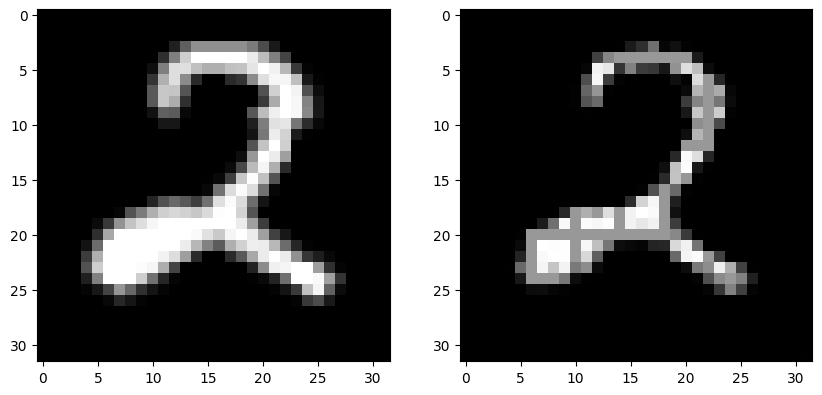

Epoch 1/9, Classification loss: 1.6501422749997268
Epoch 1/9, Classification accuracy: 0.8664120864461046
Test loss: 0.816918845009652
Test accuracy: 0.8960987261146497
Epoch 2/9, Training loss: 0.8162987141878908
Epoch 2/9, Classification loss: 1.8288081512491248
Epoch 2/9, Classification accuracy: 0.8525713713980789
Test loss: 0.8132727924425891
Test accuracy: 0.8966958598726115
Epoch 3/9, Training loss: 0.8141750325642629
Epoch 3/9, Classification loss: 1.846209430866333
Epoch 3/9, Classification accuracy: 0.8395977854855923
Test loss: 0.8119640635077361
Test accuracy: 0.8295183121019108
Epoch 4/9, Training loss: 0.8132695378844995


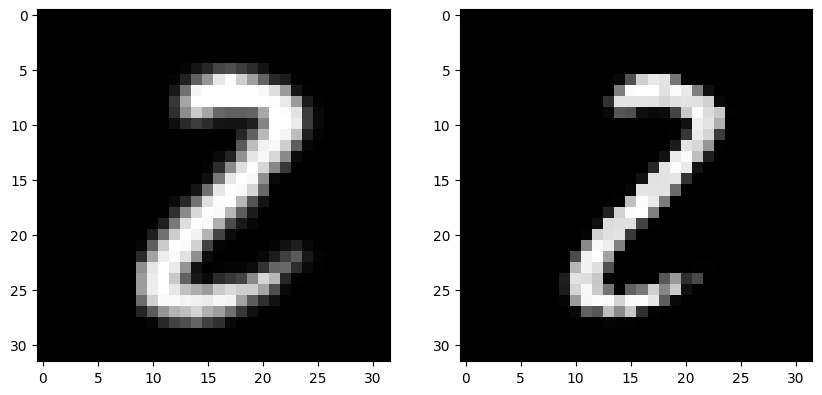

Epoch 4/9, Classification loss: 1.6280784381309021
Epoch 4/9, Classification accuracy: 0.8490695037353255
Test loss: 0.8113475612774017
Test accuracy: 0.8108081210191083
Epoch 5/9, Training loss: 0.8127905133566963
Epoch 5/9, Classification loss: 1.5958761506522097
Epoch 5/9, Classification accuracy: 0.8440334845250801
Test loss: 0.8109371593803357
Test accuracy: 0.770203025477707
Epoch 6/9, Training loss: 0.8124556206206501
Epoch 6/9, Classification loss: 1.456098535443033
Epoch 6/9, Classification accuracy: 0.8474519743863393
Test loss: 0.8106698553273632
Test accuracy: 0.8307125796178344
Epoch 7/9, Training loss: 0.8122846536982403


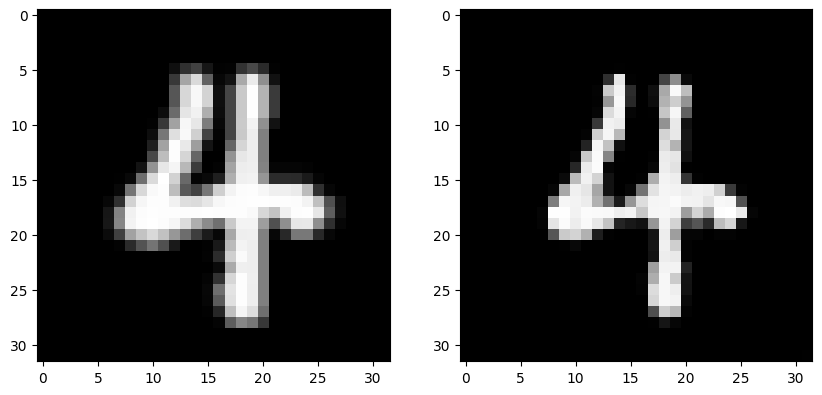

Epoch 7/9, Classification loss: 1.6481374539116849
Epoch 7/9, Classification accuracy: 0.8425827107790822
Test loss: 0.8105787706982558
Test accuracy: 0.908937101910828
Epoch 8/9, Training loss: 0.812167141455342
Epoch 8/9, Classification loss: 1.6418269654555027
Epoch 8/9, Classification accuracy: 0.8485692369263608
Test loss: 0.8104213586278782
Test accuracy: 0.9025676751592356
Epoch 9/9, Training loss: 0.811969378841852
Epoch 9/9, Classification loss: 1.727577680234848
Epoch 9/9, Classification accuracy: 0.8520377534685165
Test loss: 0.8101771249892605
Test accuracy: 0.912718949044586


In [ ]:
n_epochs = 9
n_epochs_cls = 3

training_losses = []
classification_losses = []

for epoch in range(n_epochs):
    training_loss_per_epoch = []
    model.train()
    for x, y in training_dataloader:
        x, y = x.to(device), y.to(device)
        _, decoder = model(x)
        optimizer.zero_grad()
        loss = criterion(x, decoder)
        loss.backward()
        optimizer.step()
        training_loss_per_epoch.append(loss.item())

    training_losses.append(np.array(training_loss_per_epoch).mean())
    print(f"Epoch {epoch+1}/{n_epochs}, Training loss: {np.array(training_loss_per_epoch).mean()}")
    if epoch % 3 == 0:
      fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
      ax[0].imshow(x[0].cpu().detach().numpy().squeeze(), cmap="gray")
      ax[1].imshow(decoder[0].cpu().detach().numpy().squeeze(), cmap="gray")
      plt.show()

    # Train Classification
    classification_model = Classification().to(device)
    optimizer_classification = optim.Adam(classification_model.parameters(), lr=0.01)
    criterion_classification = nn.CrossEntropyLoss()
    classification_model.train()
    loss_classification = []
    for epoch_cls in range(n_epochs_cls):
      epoch_accuracy = []
      for x, y in training_dataloader:
        x, y = x.to(device), y.to(device)
        encoder, _ = model(x)
        pred_y = classification_model(encoder)
        optimizer_classification.zero_grad()
        loss = criterion_classification(pred_y, y)
        loss.backward()
        optimizer_classification.step()

        if epoch_cls == (n_epochs_cls -1):
          loss_classification.append(loss.item())
          # Calculate accuracy for training
          accuracy = (pred_y.argmax(dim=1) == y).type(torch.float).mean().item()
          epoch_accuracy.append(accuracy)

    classification_losses.append(np.array(loss_classification).mean())
    print(f"Epoch {epoch+1}/{n_epochs}, Classification loss: {np.array(loss_classification).mean()}")
    print(f"Epoch {epoch+1}/{n_epochs}, Classification accuracy: {np.array(epoch_accuracy).mean()}")

    # Test AutoEncoder
    with torch.inference_mode():
        test_losses = []
        accuracy_total = []
        model.eval()
        classification_model.eval()
        for x, y in testing_dataloader:
            x, y = x.to(device), y.to(device)
            encoder, decoder = model(x)
            y_pred = classification_model(encoder)
            loss = criterion(x, decoder)
            test_losses.append(loss.item())
            accuracy = (y_pred.argmax(dim=1) == y).type(torch.float).mean()
            accuracy_total.append(accuracy.item())
        print(f"Test loss: {np.array(test_losses).mean()}")
        print(f"Test accuracy: {np.array(accuracy_total).mean()}")